In [1]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt


In [2]:
teams = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\teams.json")
players = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\players.json")
coaches = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\coaches.json")

events_England = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_England.json")
events_European_Championship = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_European_Championship.json")
events_France = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_France.json")
events_Germany = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_Germany.json")
events_Italy = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_Italy.json")
events_Spain = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_Spain.json")
events_World_Cup = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_World_Cup.json")

In [3]:
#Normalize data in order get Player names
df_players_birthArea=pd.DataFrame(json_normalize(players['birthArea']))
df_players_passportArea=pd.DataFrame(json_normalize(players['passportArea']))
df_players_role=pd.DataFrame(json_normalize(players['role']))

In [4]:
df_players = pd.DataFrame(players)

In [5]:
df_players_F = pd.concat([df_players_birthArea, df_players.loc[:,'birthDate':'middleName'],df_players_passportArea,df_players_role,df_players.loc[:,'shortName':'wyId']], axis=1, join='inner')

In [6]:
#convert all json Event files to the DataFrame and merge them
df_events_England=pd.DataFrame(events_England)
df_events_European_Championship=pd.DataFrame(events_European_Championship)
df_events_France=pd.DataFrame(events_France)
df_events_Germany=pd.DataFrame(events_Germany)
df_events_Italy=pd.DataFrame(events_Italy)
df_events_Spain=pd.DataFrame(events_Spain)
df_events_World_Cup=pd.DataFrame(events_World_Cup)

In [7]:
df_events_F = pd.concat([df_events_England, df_events_European_Championship, df_events_France, df_events_Germany, df_events_Italy,df_events_Spain,df_events_World_Cup],axis=0, join='inner')

In [8]:
df_players_F.head(5)


,alpha2code,alpha3code,id,name,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,...,alpha2code,alpha3code,id,name,code2,code3,name,shortName,weight,wyId
0,TR,TUR,792,Turkey,1989-06-17,4687,4502,Harun,right,187,...,TR,TUR,792,Turkey,GK,GKP,Goalkeeper,H. Tekin,78,32777
1,FR,FRA,250,France,1999-01-23,4423,3775,Malang,left,182,...,SN,SEN,686,Senegal,DF,DEF,Defender,M. Sarr,73,393228
2,FR,FRA,250,France,1998-10-26,null,3772,Over,,176,...,FR,FRA,250,France,GK,GKP,Goalkeeper,O. Mandanda,72,393230
3,FR,FRA,250,France,1990-03-06,19314,683,Alfred John Momar,right,187,...,SN,SEN,686,Senegal,MD,MID,Midfielder,A. N'Diaye,82,32793
4,FR,FRA,250,France,1999-05-25,null,2975,Ibrahima,right,192,...,FR,FRA,250,France,DF,DEF,Defender,I. Konat\u00e9,84,393247


In [9]:
#select necesarry columns
df_events_id = pd.DataFrame(df_events_F, columns = ["playerId","eventName"])

In [10]:
#Select 'pass' events only
df_events_id=df_events_id[df_events_id.eventName=="Pass"]

In [11]:
#count freq. in order to apply threshold and select passes more than 100 per player
df_events_id_1=(df_events_id.groupby('playerId').count()>100)


In [12]:
df_events_id_1.head(5)

,eventName
playerId,
0,False
12,False
33,False
36,True
38,True


In [13]:
df_events_F.head(5)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609


In [14]:
#select playerid and tags 
df_events_id = pd.DataFrame(df_events_F, columns = ["playerId","tags","eventName"])
df_events_id=df_events_id[df_events_id.eventName=="Pass"]
df_events_id=df_events_id.drop(columns='eventName')
df_events_id.head(5)

In [18]:
# we will store into this dictionary is a playerid as a key 
# and the ratio between completed passes and attempted passes as a value
# ex. {playerID: ratio}
dict = {}
#In this loop we define a set of individual playerIds and iterate through this set
for playerid in set(df_events_id.playerId):
    # for each playerid we collect all the tags stored in the nested structure of lists and dictionaries
    # and store them in the list "ls"
    ls = list(df_events_id[df_events_id.playerId == playerid].tags)
    # we are going to use the list "fin" to store all the tag values for unique playerid
    fin = []
    for i in ls:
        for j in i:
            # adding each tag value
            fin.append(j['id'])
    # round(fin.count(1801)/len(fin),2) this expression computes the ratio we need.
    # we use ternary conditional operator in order to avoid division by zero
    dict[playerid] = 0 if len(fin)==0 else round(fin.count(1801)/len(fin),2)
print(dict)

{8192: 0.57, 0: 0.35, 368642: 0.67, 57347: 0.82, 344068: 0.8, 344065: 0.66, 8200: 0.86, 122888: 0.85, 344075: 0.51, 393228: 0.83, 12: 0.75, 8213: 0.72, 114709: 0.79, 32793: 0.8, 16411: 0.85, 8221: 0.6, 32798: 0.88, 139295: 0.64, 393247: 0.78, 33: 0.7, 32803: 0.0, 36: 0.83, 114723: 0.78, 38: 0.72, 122918: 0.88, 45: 0.68, 8239: 0.68, 48: 0.82, 8240: 0.6, 8242: 0.75, 16435: 0.56, 16436: 0.63, 8245: 0.72, 54: 0.68, 245813: 0.52, 56: 0.69, 8249: 0.81, 8246: 0.69, 229427: 0.77, 65596: 0.56, 16443: 0.73, 344120: 0.78, 122940: 0.69, 8247: 0.75, 66: 0.61, 393284: 0.65, 344132: 0.74, 352328: 0.56, 8266: 0.79, 74: 0.89, 8268: 0.68, 376908: 0.72, 77: 0.81, 41034: 0.75, 8272: 0.7, 344140: 0.56, 114762: 0.68, 8277: 0.8, 8278: 0.63, 91: 0.6, 8284: 0.6, 93: 0.54, 8285: 0.72, 8287: 0.8, 41056: 0.78, 97: 0.8, 8290: 0.62, 8291: 0.82, 8292: 0.65, 99: 0.86, 102: 0.84, 286823: 1.0, 8296: 0.62, 286825: 0.59, 8297: 0.5, 107: 0.61, 8301: 0.74, 110: 0.61, 286831: 0.71, 131184: 0.57, 8303: 0.72, 344178: 0.79, 83

In [19]:
#converting dictionary to a DataFrame
full_list = pd.DataFrame({'success': dict})

In [20]:
full_list.head()

,success
0,0.35
12,0.75
33,0.70
36,0.83
38,0.72


In [21]:
#merge two data frame and select more than 100 attempt
full_list_F= pd.merge(full_list, df_events_id_1, left_index=True, right_index=True)
full_list_F=full_list_F[full_list_F.eventName==True]
full_list_F=full_list_F.drop(['eventName'], axis=1)
full_list_F.head(5)

In [25]:
#adding names of players
df_players_F = df_players_F[["shortName","wyId"]]
df_players_F = df_players_F.set_index('wyId')
df_pass = full_list_F.sort_values(by='success', ascending=False)
top_10_players=pd.merge(df_pass, df_players_F, left_index=True, right_index=True).head(10)

In [32]:
top_10_players

,success,shortName
8034,0.94,D. Boyata
9380,0.94,J. Stones
61425,0.93,M. Milligan
94814,0.92,G. Sh\u014dji
266286,0.92,Marlon
25784,0.92,A. Abdennour
20394,0.92,Thiago Silva
231138,0.91,P. Kimpembe
214609,0.91,Y. Cardinale
21006,0.91,L. Tonelli


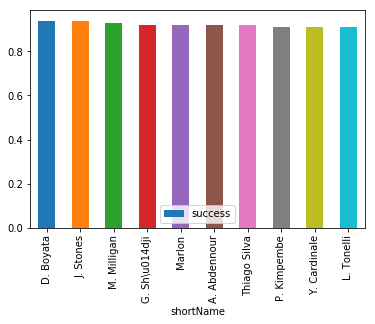

In [33]:
top_10_players.plot(kind='bar',x="shortName",y="success")